
<div class="alert alert-block alert-success"> 
<b>En el siguiente proyecto hice un filtrado de la informacion necesario para el analisis en SQL y luego teniendo los dataset en formato CSV hice lo siguiente</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning"> 





In [70]:
import pandas as pd
import plotly.express as px
from scipy import stats as st
from scipy.stats import levene
company_trips = pd.read_csv("/datasets/project_sql_result_01.csv")
dropoff_trips = pd.read_csv("/datasets/project_sql_result_04.csv")



Importar libreria y guardar los dataframes en variables

In [62]:
dropoff_trips["average_trips"] = dropoff_trips["average_trips"].astype("int") 

dropoff_trips = dropoff_trips.sort_values(by="average_trips",ascending=False)
dropoff_trips_top = dropoff_trips.head(10)

dropoff_trips_top


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


Cambie el tipo de datos de average_trips ya que no existe un viaje y medio y mostre los 10 primeros resultados de la tabla organizando de mayor a menor (ya lo estaba pero es mejor asegurar)

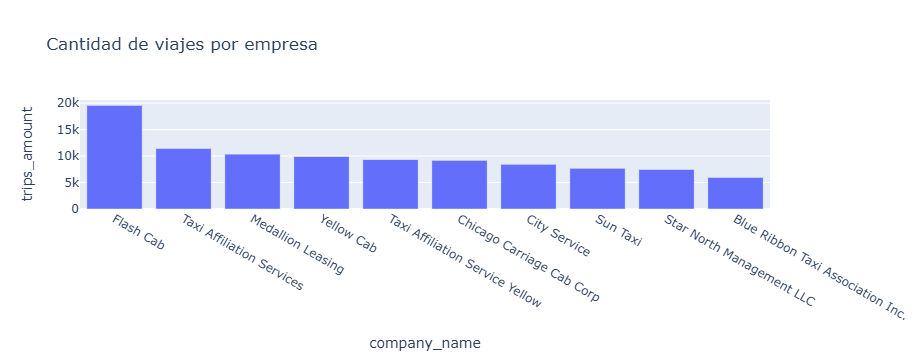

In [63]:
company_trips = company_trips.sort_values(by="trips_amount",ascending=False)
company_trips_top = company_trips.head(10)

taxis_vs_viajes = px.bar(company_trips_top,x="company_name",y="trips_amount",title="Cantidad de viajes por empresa")
taxis_vs_viajes

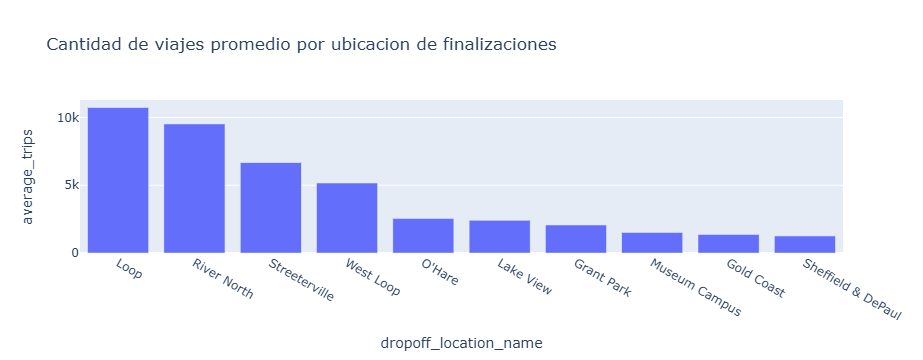

In [64]:
dropoff_vs_viajes = px.bar(dropoff_trips_top,x="dropoff_location_name",y="average_trips",title="Cantidad de viajes promedio por ubicacion de finalizaciones")
dropoff_vs_viajes

Al hacer graficos de las empresas de taxis mas utilizadas y la ubicacion de finalizacion mas popular se puede concluir que la empresa de taxis mas grande es "Flash Cab" por bastante y los barrios Loop, River North y Streeterville son en donde mas se dejan pasajeros en promedio, posiblemente sean zonas donde estan ubicadas empresas donde trabaja una buena cantidad de los usuarios de la aplicacion.

In [65]:
viajes_loop_ohare = pd.read_csv("/datasets/project_sql_result_07.csv")
viajes_loop_ohare["duration_seconds"] = viajes_loop_ohare["duration_seconds"].astype("int")
viajes_loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318
1065,2017-11-11 13:00:00,Good,2100
1066,2017-11-11 08:00:00,Good,1380


In [66]:
viajes_loop_ohare_good = viajes_loop_ohare[viajes_loop_ohare["weather_conditions"]=="Good"]
viajes_loop_ohare_bad = viajes_loop_ohare[viajes_loop_ohare["weather_conditions"]=="Bad"]

Filtre los dataframes para discriminar entre Good y Bad para luego hacer la prueba de hipotesis el uno con el otro,

La hipotesis nula que voy a manejar es que no hay diferencia entre la duracion promedio de los viajes desde loop hasta el aeropuerto O'hare durante sabados lluviosos, ya que la hipotesis nula tiende a implica la ausencia de cambio

In [74]:
viajes_loop_ohare_good_duration = viajes_loop_ohare_good["duration_seconds"]
viajes_loop_ohare_bad_duration = viajes_loop_ohare_bad["duration_seconds"]
stat, p = levene(viajes_loop_ohare_good_duration,viajes_loop_ohare_bad_duration)
print(p)

0.5332038671974493


Prueba levene para revisar la varianza entre poblaciones, en este caso no hay evidencia de varianzas distintas

In [78]:
alfa = 0.05
test_result = st.ttest_ind(viajes_loop_ohare_good_duration,viajes_loop_ohare_bad_duration)
print(test_result.pvalue)
print(f"Siendo el pvalue de la prueba de hipotesits {test_result.pvalue} podemos rechazar la hipotesis nula")

6.517970327099473e-12
Siendo el pvalue de la prueba de hipotesits 6.517970327099473e-12 podemos rechazar la hipotesis nula


El resultado de la prueba dicta que no podemos asumir que la duracion de los viajes se mantiene igual independientemente del clima, por lo que nos podemos inclinar a pensar que esta si cambia cuando hace mal clima.